In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Question 1) Please read the "sales.csv" file as a DataFrame object named as "sales_df". Print the length and the first 5 tuples of the DataFrame. (5 points)

In [2]:
#codes
sales_df = pd.read_csv("sales.csv")
sales_df = pd.DataFrame(sales_df)

a, b = sales_df.shape
print("Length of DataFrame:", a)
sales_df.head(5)

Length of DataFrame: 8523


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Question2) Split the dataset into the independent (name it 'x') and dependent variables (name it 'y') which are predictors and response variable( 'Item_Outlet_Sales'). Print their shape info and top 10 records of them. (5 points)

In [3]:
#codes
x = sales_df.drop(sales_df.columns[4], axis = 1)
y = sales_df.iloc[:, 4]

In [4]:
a = x.shape
print("Shape of DataFrame is:", a)
pd.DataFrame(x).head(10)

Shape of DataFrame is: (8523, 45)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [5]:
a = y.shape
print("Shape of DataFrame is:", a)
pd.DataFrame(y).head(10)

Shape of DataFrame is: (8523,)


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
5,556.6088
6,343.5528
7,4022.7636
8,1076.5986
9,4710.5350


Question3) Normalization step: Rescale independent variables (x variable) into the range [0,1] by applying  MinMaxScaler to normalize. Lastly convert into dataframe (10 points)

In [6]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
pd.DataFrame(x_scaled, columns=x.columns)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.321546,0.172914,0.777729,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,0.392506,0.143069,0.326263,0.708333,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.496487,0.107148,0.228492,0.791667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,0.337705,0.442219,0.304939,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
#codes

Question 4) Split data into train and test sets. Use the split ratio as 80:20 and set the 'random_state' to an integer value. (10 points)

In [8]:
# Importing Train test split
from sklearn.model_selection import train_test_split

In [9]:
#codes
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.2, random_state= 1)

Question 5) Create an instance of kNN with a number of neighbors=3, then fit kNN regression model to train data. Finally, make prediction and calculate mean squared error (MSE). Print MSE value. (15 points)

In [10]:
#importing KNN regressor and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [11]:
#codes
model = KNN(n_neighbors=3)
model.fit(X_train, Y_train)
pred=model.predict(X_test)
error = mse(Y_test,pred)
print('MSE value for k= ' , 3 , 'is:', error)

MSE value for k=  3 is: 1790835.1426143483


Question 6) Create Elbow function which does the same operation in the previous question for each k instance in the range [1-40] by using Manhattan and Euclidean distance metrics separately in order to determine the optimal value of k. (25 points)

In [12]:
#codes
K = 0
mse_val= []
dist_euclidean = []
def euclidean():
    for K in range(40):
        K = K+1
        model1 = KNN(n_neighbors = K, metric= 'euclidean')

        model1.fit(X_train, Y_train)
        pred=model1.predict(X_test)
        error = mse(Y_test,pred)
        dist_euclidean.append(error)
        print('Euclidean distance for k= ' , K , 'is:', dist_euclidean[K - 1])

Call the defined function for defined range of k

In [13]:
#codes
euclidean()

Euclidean distance for k=  1 is: 2580788.5694816415
Euclidean distance for k=  2 is: 2002355.6593177617
Euclidean distance for k=  3 is: 1790835.1426143483
Euclidean distance for k=  4 is: 1693787.0840163894
Euclidean distance for k=  5 is: 1627669.3939864002
Euclidean distance for k=  6 is: 1573959.2378046792
Euclidean distance for k=  7 is: 1560249.131080644
Euclidean distance for k=  8 is: 1538653.0118604705
Euclidean distance for k=  9 is: 1527023.832383918
Euclidean distance for k=  10 is: 1533627.7367054534
Euclidean distance for k=  11 is: 1538503.8506280594
Euclidean distance for k=  12 is: 1544621.2345625674
Euclidean distance for k=  13 is: 1560371.386699611
Euclidean distance for k=  14 is: 1562031.2316886005
Euclidean distance for k=  15 is: 1575510.276417339
Euclidean distance for k=  16 is: 1575797.5316855882
Euclidean distance for k=  17 is: 1583502.8533401762
Euclidean distance for k=  18 is: 1591797.0059125614
Euclidean distance for k=  19 is: 1604804.36374157
Euclidea

In [14]:
M = 0
dist_manhattan = []
def manhattan():
    for M in range(40):
        M = M+1
        model2 = KNN(n_neighbors = M, metric= 'manhattan')
        model2.fit(X_train, Y_train)
        pred=model2.predict(X_test)
        error = mse(Y_test,pred)
        dist_manhattan.append(error)
        print('Manhattan distance for k= ' , M , 'is:', dist_manhattan[M - 1])

In [15]:
manhattan()

Manhattan distance for k=  1 is: 2718732.3384558363
Manhattan distance for k=  2 is: 2038160.718367595
Manhattan distance for k=  3 is: 1801930.9523505706
Manhattan distance for k=  4 is: 1679718.2719172193
Manhattan distance for k=  5 is: 1612327.0207807757
Manhattan distance for k=  6 is: 1577982.8982004875
Manhattan distance for k=  7 is: 1560658.436872422
Manhattan distance for k=  8 is: 1551344.342791123
Manhattan distance for k=  9 is: 1551332.4177884955
Manhattan distance for k=  10 is: 1558307.240378575
Manhattan distance for k=  11 is: 1566084.175528615
Manhattan distance for k=  12 is: 1574617.9958598597
Manhattan distance for k=  13 is: 1574080.2496181694
Manhattan distance for k=  14 is: 1586296.2604442402
Manhattan distance for k=  15 is: 1596491.8303129147
Manhattan distance for k=  16 is: 1611663.2977170458
Manhattan distance for k=  17 is: 1624701.0006462391
Manhattan distance for k=  18 is: 1640032.490958409
Manhattan distance for k=  19 is: 1655528.5888776903
Manhatta

Optimal value of k for Elbow Function: 9

Question 7) Visualize the test mean squared error (MSE) results of Manhattan and Euclidean distance metric by plotting. Two curves should be displayed in the same graph. (15 points)

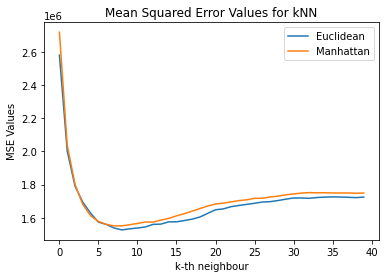

In [16]:
#codes
plt.title('Mean Squared Error Values for kNN')
plt.plot(dist_euclidean, label = "Euclidean")
plt.plot(dist_manhattan, label = "Manhattan")
plt.xlabel('k-th neighbour')
plt.ylabel('MSE Values')
plt.legend()

Question 8) According to obtained result, decide distance metric and optimal k value, and then use them for your kNN model, and make a prediction. Print MSE value for chosen k value. (15 points)

In [17]:
#codes
model = KNN(n_neighbors=9, metric= 'euclidean')
model.fit(X_train, Y_train) #fit the model
pred=model.predict(X_test) #make prediction on test set
error = mse(Y_test,pred) #calculate mse
print('MSE value for k= ' , 9 , 'is:', error)

MSE value for k=  9 is: 1527023.832383918


As you can see on the Mean Squared Error Values for kNN graph, MSE is smallest for k is equal to 9. So I chosed k as 9 in my model. Also as you can see again when k is equal to 9, euclidean distance is smaller than manhattan so chosed euclidean as distance metric.